In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st

In [21]:
df = pd.read_csv("Classification_train.csv")

In [22]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
x_train = df.sample(frac=0.6, random_state=42)
temp_df = df.drop(x_train.index)
x_dev = temp_df.sample(frac=0.5, random_state=42)
x_test = temp_df.drop(x_dev.index)
y_train = x_train.pop("label").values
y_dev = x_dev.pop("label").values
y_test = x_test.pop("label").values

In [37]:
x_test.shape

(6000, 784)

In [27]:
def normi_ele(x):
    meu = np.mean(x, axis = 0)
    std = np.std(x, axis=0)
    return meu, std

In [28]:
def normalise(x, meu, std):
    n_x = (x-meu)/std
    return n_x

In [29]:
def distance(x_test, x, y, k):
    dis = np.sum(np.square(x - x_test), axis = 1)
    dis = dis.to_numpy()
    dis = dis.reshape(x.shape[0], 1)
    dis_label = np.append(dis, y, axis=1)
    sorted_array = dis_label[dis_label[:, 0].argsort()]
    k_sorted_labels = sorted_array[:k,1]
    y_hat = st.mode(k_sorted_labels)
    return y_hat

In [30]:
def y_hat_list(x_test, x, y, k):
    y_hat = []
    x_test = x_test.to_numpy()
    for i in range(x_test.shape[0]):
        y_hat.append(distance(x_test[i], x, y, k))
        if i % 100 == 0:
            print(f"iteration: {i}")
    return np.array(y_hat)

In [31]:
meu, std = normi_ele(x_train)
n_x_train = normalise(x_train, meu, std)
n_x_test = normalise(x_test, meu, std)

In [ ]:
performance_lst = []
for k_i in range(2, 20): 
    y_hat = y_hat_list(n_x_test, n_x_train, y_train.reshape(x_train.shape[0], 1), k_i)
    sum = np.sum(y_hat == y_test)
    performance_lst.append(sum/len(y_test))

In [29]:
print(performance_lst)

[0.9656666666666667, 0.9625, 0.9638333333333333, 0.957, 0.9605, 0.9605, 0.961, 0.9576666666666667, 0.9603333333333334, 0.9578333333333333, 0.9601666666666666, 0.9578333333333333, 0.9576666666666667, 0.955, 0.9548333333333333, 0.9541666666666667, 0.9545, 0.9523333333333334]


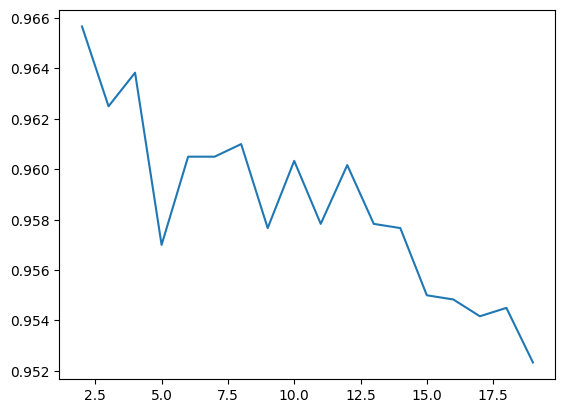

In [30]:
plt.plot(np.arange(2, 20), performance_lst)